# Simple Linear Regression (Univariate)

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Reading the Dataset**

In [4]:
df = pd.read_csv("/kaggle/input/advertising/Advertising.csv")
df.head()

# It shows the advertising and corresponding sales in thousands of dollars.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Engineering Features**

In [5]:
# As we can see, we have three features. So what we'll do is combine all the three of them
# into one feature and we'll name it "total_spend"

df['total_spend'] = df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


**Visualizing the Data**

<Axes: xlabel='total_spend', ylabel='sales'>

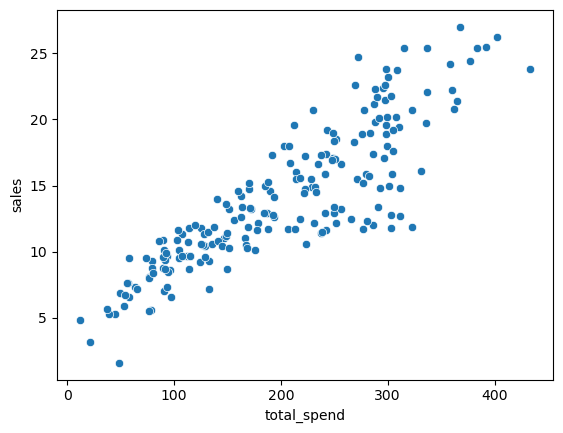

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales')

# It shows a positive correlation i.e. the more the total_spend, the more the sales.

<Axes: xlabel='total_spend', ylabel='sales'>

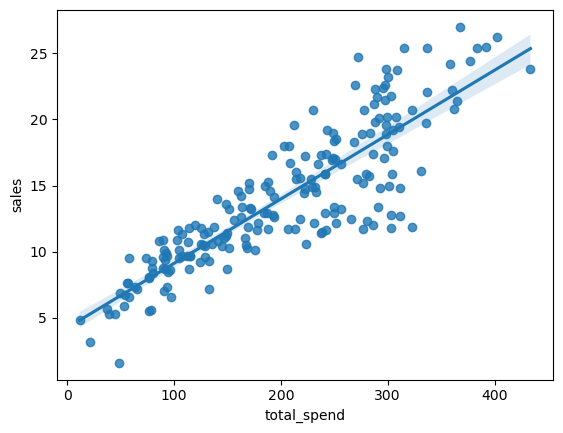

In [7]:
# We can actually use the regplot to get the best fit regression line
sns.regplot(data=df, x='total_spend', y='sales')

**Applying Linear Regression**

In [9]:
# Splitting the data into features and labels
X = df['total_spend']
y = df['sales']

# Now let's use NumPy to get our beta values.
np.polyfit(X,y,deg=1)

# We got two values. The first value is B1 and the second one is B0 (the two values used in simple linear regression)

array([0.04868788, 4.24302822])

In [10]:
# Now let's apply the values manually to get the best fit line

# Getting some potential spend values
potential_spend = np.linspace(0, 500, 100)

# Getting predicted sales
predicted_sales = 4.24302822 + 0.04868788*potential_spend

predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

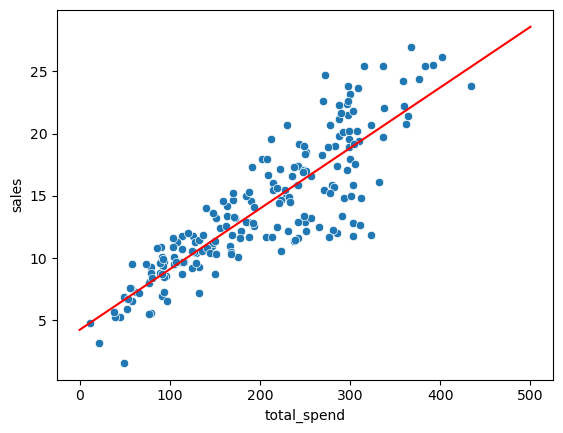

In [12]:
# Let's plot the best fit line on the original values
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

# Comparing the line with the one generated earlier with regplot, they both seem the same.
# We've successfully achieved linear regression.